In [1]:
import itertools

import numpy as np
from qutip import *
# some_file.py
# import sys
from qudit import *
# import scipy
import time
import IPython.display as disp
from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from continuous import *
from discrete_simulation import *
from dataclasses import dataclass
import dill
from datetime import date

# sys.path.insert(1, 'C:\\Users\\shoha\\Documents\\GitHub\\grimsmo-paper-simulations')

# from measurements import *

%load_ext autoreload
%autoreload 2

## parameters

In [2]:
@dataclass
class ContSimResults:
    N: int
    d: int
    m_i: int
    m_c: int
    alpha: float
    simulationObject: ContinuousSimulation
    fid_prob_list: list
    gamma_list: list

    def get_fid_array(self):
        return [tup[0] for tup in self.fid_prob_list]
    
    def get_prob_array(self):
        return [tup[1] for tup in fid_prob_list]



In [3]:
d = 16
m_i = 8
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,15)
gamma_ratio = 1
alpha=7

## First Discrete part

In [4]:
m_c = 4

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list164 = [tup[0] for tup in fid_prob_list]
prob_list164 = [tup[1] for tup in fid_prob_list]

m_c = 8

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168 = [tup[0] for tup in fid_prob_list]
prob_list168 = [tup[1] for tup in fid_prob_list]

## Now continuous part

In [ ]:
m_c = 4
n = 8
N = 200

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=16)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))

fid_list_con4 = [tup[0] for tup in fid_prob_list]
prob_list_con4 = [tup[1] for tup in fid_prob_list]

In [ ]:
simRes4 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=}.pkl', 'wb') as file:
    dill.dump(simRes4, file)

In [4]:
m_c = 8
n = 7
N = 150

process_count = 30  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]


simRes8 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=}.pkl', 'wb') as file:
    dill.dump(simRes8, file)

In [4]:
m_c = 8
n = 7
N = 150

process_count = 30  # mp.cpu_count()-9

def pool_helper(gamma_loss, gamma_dephasing, fidelity_cut=0):
    sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)
    return sim.average_fidelity(gamma_loss, gamma_dephasing, fidelity_cut)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]


simRes8 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=}.pkl', 'wb') as file:
    dill.dump(simRes8, file)

# squeezing

In [ ]:
m_c = 8
n = 8
N = 200
squeezed = -0.8

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8, squeezed = squeezed)


fid_prob_list = []
for gamma in tqdm(gamma_list):
    fid_prob_list.append(sim.average_fidelity(gamma, gamma_ratio*gamma, fidelity_cut))
    print(fid_prob_list)
fid_list_con8_sq = [tup[0] for tup in fid_prob_list]
prob_list_con8_sq = [tup[1] for tup in fid_prob_list]


simRes8sq = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'results/{date.today()},simRes{m_c=},{alpha=},{squeezed=}2.pkl', 'wb') as file:
    dill.dump(simRes8sq, file)

In [ ]:
m_c = 8
n = 8
N = 200
alpha = 7
proObj = ContinuousProtocol(coherent(N,alpha),res=16,m_i=m_i, m_c=8)
limit = (coherent(N,10).dag() * proObj._create_phase_parity_measurement(1) * coherent(N,10)).full()[0][0]

# m_c = 8
# n = 8
# N = 200
# alpha = 7
squeezed = -0.8
proObj = ContinuousProtocol(coherent(N,alpha),res=16,m_i=m_i, m_c=8)
state = displace(N,alpha) * squeeze(N, squeezed) * coherent(N,0)
limit_sq = (state.dag() * proObj._create_phase_parity_measurement(1) * state).full()[0][0]

In [127]:
print(f"{limit=}, {limit_sq=}")

limit=(9.74776679261118e-05+0j), limit_sq=(0.0006197253864758562+0j)


In [99]:
(state.dag() * proObj._create_phase_parity_measurement(1) * state).full()

array([[1.2557518e-06+0.j]])

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

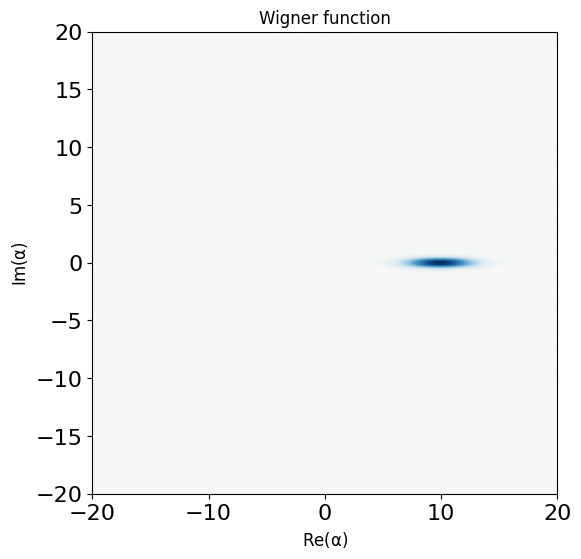

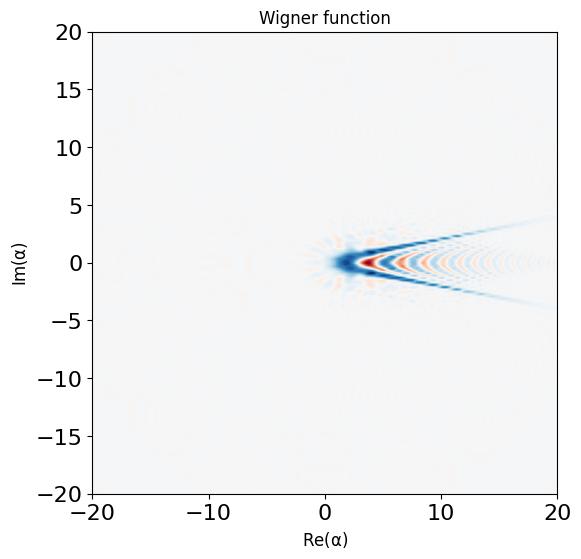

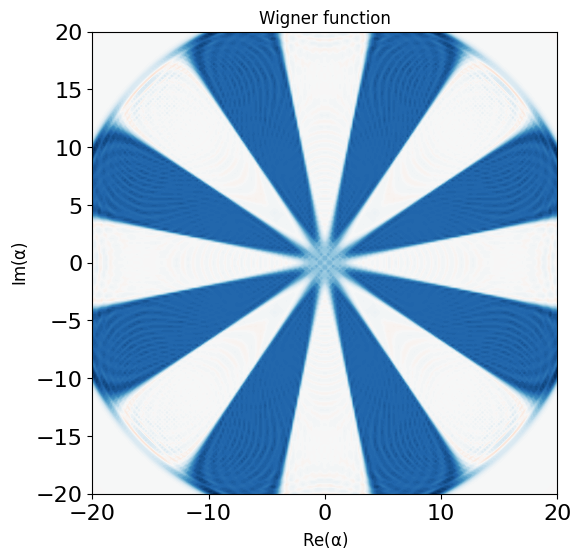

In [122]:
# plot_wigner(coherent(N,10), alpha_max=14)
plot_wigner(state, alpha_max=20)
plot_wigner(proObj._create_phase_parity_measurement(1) * state, alpha_max=20)
plot_wigner(proObj._create_phase_parity_measurement(1), alpha_max=20)

### opening results from last time if needed:

In [18]:
with open("results/2023-08-31,simResm_c=8,alpha=10.pkl", 'rb') as file:
    contsimres = dill.load(file)
fid_prob_list = contsimres.fid_prob_list

fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]

with open("results/2023-10-03,simResm_c=8,alpha=10,squeezed=-1,2.pkl", 'rb') as file:
    contsimres = dill.load(file)
fid_prob_list = contsimres.fid_prob_list

fid_list_con8_sq = [tup[0] for tup in fid_prob_list]

In [ ]:
plt.figure(dpi=100)

plt.rcParams['font.size'] = 16

# plt.loglog(gamma_list,1-np.array(fid_list164), 'b.-', label="$m_c=4$ discrete")
plt.loglog(gamma_list,1-np.array(fid_list168), 'g-', label="Discrete")
# plt.loglog(gamma_list,1-np.array(fid_list_con4), 'c.--', label="$m_c=4$ continuous")
# plt.loglog(gamma_list,1-np.array(fid_list_con8), 'k.--', label="Continuous with coherent $\|\\Theta\\rangle$")
plt.loglog(gamma_list,1-np.array(fid_list_con8), 'k.--', label=r"Continuous with coherent $\left| \Theta \right\rangle$")
plt.loglog(gamma_list,1-np.array(fid_list_con8_sq), 'm.--', label="Continuous with squeezed $|\\Theta\\rangle$")

plt.axhline(limit, color = 'k', linestyle = ':', label="quantum noise limit for coherent")
plt.axhline(limit_sq, color = 'm', linestyle = ':', label="quantum noise limit for squeezed")

# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\\gamma_l$ and $\\gamma_\\phi$")  # decay and 1/{gamma_ratio} 
plt.ylabel("Infidelity")
plt.ylim([1,1e-6])
# plt.xlim([1e-2,1e-1])
plt.legend(prop={'size': 14})
# plt.title(f"${d=},{m_i=}, \\alpha={alpha} $")
# plt.gca().invert_yaxis()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()
# plt.savefig('plots/continuous_vs_discrete.pdf', bbox_inches='tight')

In [ ]:
import dill

with open('fid_list_con4.pkl', 'wb') as file:
    dill.dump(fid_list_con4, file)

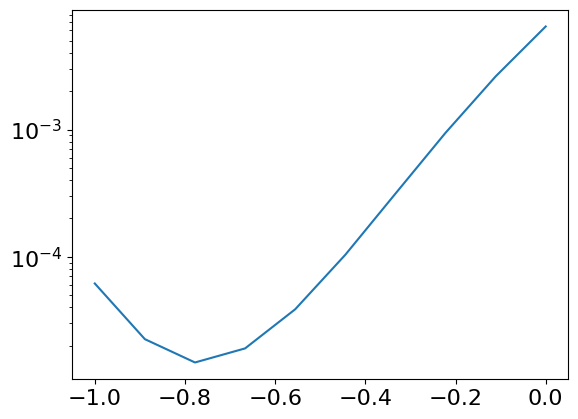

In [142]:
m_c = 8
n = 9
# N = 2**n
N = 150
alpha = 7
res = []
squeezed_list = np.linspace(0,-1,10)
for squeezed in squeezed_list:
    proObj = ContinuousProtocol(coherent(N,alpha),res=16,m_i=m_i, m_c=8)
    state = displace(N,alpha) * squeeze(N, squeezed) * coherent(N,0)
    limit_sq = (state.dag() * proObj._create_phase_parity_measurement(1) * state).full()[0][0]
    res.append(limit_sq)
plt.plot(squeezed_list,res)
plt.yscale('log')